In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam,SGD

from tensorflow.keras.datasets import cifar10

In [2]:
#데이터 가져오기
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

In [3]:
x_train=x_train.reshape(-1,32,32,3) # 데이터 수 행 열 색상종류
x_test=x_test.reshape(-1,32,32,3)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [4]:
x_train=x_train.astype(np.float32)/255.0 # 0-1 정규화
x_test=x_test.astype(np.float32)/255.0

In [5]:
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

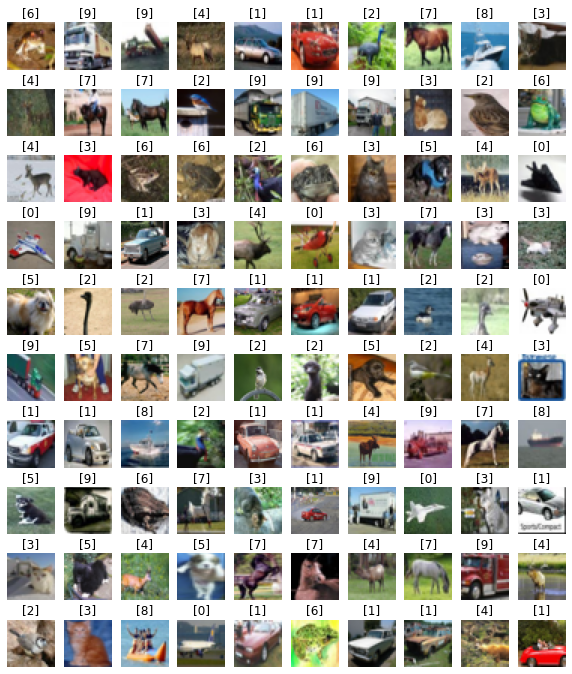

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,12))
for index in range(100):
    plt.subplot(10,10,index+1)
    plt.imshow(x_train[index],cmap='gray')
    plt.axis('off')
    plt.title(str(y_train[index]))
plt.show()

In [7]:
#순서대로 10개 만 본다.
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [8]:
cnn=Sequential()
cnn.add(Conv2D(input_shape=(32,32,3), kernel_size=(3,3), filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.3))

# 완전연결성 평탄화
cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
#출력 10 (10가지중에 하나)
cnn.add(Dense(10, activation='softmax'))

In [9]:
cnn.compile(loss='sparse_categorical_crossentropy',
           optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy']) #정답 원 핫으로 안 만들었을 때 sparse
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1605760   
                                                        

In [10]:
hist=cnn.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test)) # 전체 크기를 배치 사이즈로 애폭크기가 줄어듬

Epoch 1/30
391/391 [==============================] - 55s 140ms/step - loss: 1.6387 - accuracy: 0.4053 - val_loss: 1.2652 - val_accuracy: 0.5587
Epoch 2/30
391/391 [==============================] - 60s 154ms/step - loss: 1.3043 - accuracy: 0.5347 - val_loss: 1.0964 - val_accuracy: 0.6189
Epoch 3/30
391/391 [==============================] - 57s 146ms/step - loss: 1.1726 - accuracy: 0.5838 - val_loss: 1.0102 - val_accuracy: 0.6526
Epoch 4/30
391/391 [==============================] - 59s 152ms/step - loss: 1.0901 - accuracy: 0.6147 - val_loss: 0.9537 - val_accuracy: 0.6686
Epoch 5/30
391/391 [==============================] - 59s 151ms/step - loss: 1.0286 - accuracy: 0.6377 - val_loss: 0.9393 - val_accuracy: 0.6776
Epoch 6/30
391/391 [==============================] - 57s 145ms/step - loss: 0.9755 - accuracy: 0.6564 - val_loss: 0.9081 - val_accuracy: 0.6857
Epoch 7/30
391/391 [==============================] - 56s 144ms/step - loss: 0.9323 - accuracy: 0.6706 - val_loss: 0.9090 - val_ac

In [11]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.9367 - accuracy: 0.7155


[0.936697244644165, 0.715499997138977]

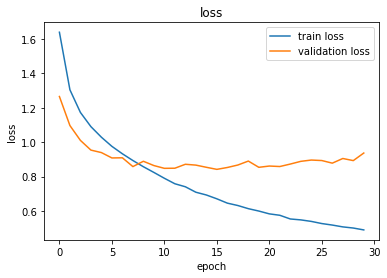

In [12]:
import matplotlib.pyplot as plt
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')
plt.show()

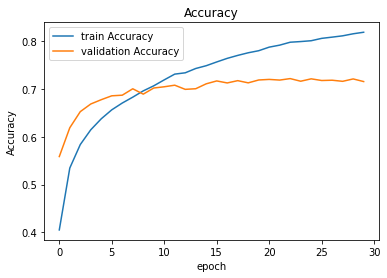

In [13]:
# loss대신 정확도
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'],label='train Accuracy')
plt.plot(hist.history['val_accuracy'], label='validation Accuracy')
plt.legend(loc='best')
plt.show()